In [180]:
# Lab 4 done by Raj Kumar Ranabhat
# Import Modules and libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA

In [181]:
data_url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
data = pd.read_csv(data_url, error_bad_lines=False) # Read a comma-separated values (csv) file into DataFrame.
data.head() # visualization of heart.csv file

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [182]:
# https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970
one_hot=pd.get_dummies(data.famhist, prefix='familyhist')
data = pd.concat([data, one_hot], axis=1)
data =data.drop('famhist', 'columns')
print("One-hot encoding of famhist ")
data.head()

One-hot encoding of famhist 


,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,familyhist_Absent,familyhist_Present
0,1,160,12.00,5.73,23.11,49,25.30,97.20,52,1,0,1
1,2,144,0.01,4.41,28.61,55,28.87,2.06,63,1,1,0
2,3,118,0.08,3.48,32.28,52,29.14,3.81,46,0,0,1
3,4,170,7.50,6.41,38.03,51,31.99,24.26,58,1,0,1
4,5,134,13.60,3.50,27.78,60,25.99,57.34,49,1,0,1


In [183]:
def z_score(df):  # Normalization using z score
    # copy the dataframe
    df_std = df.copy()
    df_std_2 =df_std.iloc[:, :-2]
    # apply the z-score method
    for column in df_std_2.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()        
    return df_std  

In [184]:
# Splitting our DataFrame to features and target for training
datafeatures = data[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'familyhist_Absent', 'familyhist_Present']]
datatargets = data[['chd']]

In [185]:
datafeatures = z_score(datafeatures) 

In [186]:
# https://www.codegrepper.com/code-examples/python/split+dataframe+into+train+and+test+python
train_datafeatures, test_datafeatures, train_datatargets, test_datatargets =  train_test_split(datafeatures, datatargets, test_size = 0.5, random_state = 42) 

In [187]:
# https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a
def KmeansCluster(train_datafeatures, test_datafeatures):
  n_clusters = len(np.unique(train_datatargets))  # we have two clusters 
  cluster= KMeans(n_clusters = n_clusters, random_state = 42)
  cluster.fit(train_datafeatures)
  pred_target = cluster.predict(test_datafeatures)
  accuracy = round(accuracy_score(test_datatargets, pred_target),3)
  print("Accuracy of KMeans Clustering: {} % ".format(accuracy*100))
  return pred_target

Accuracy of KMeans Clustering: 65.8 % 


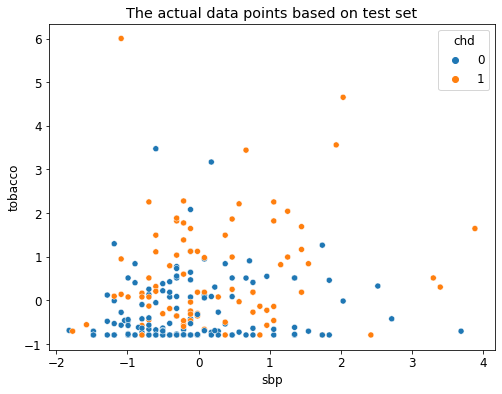

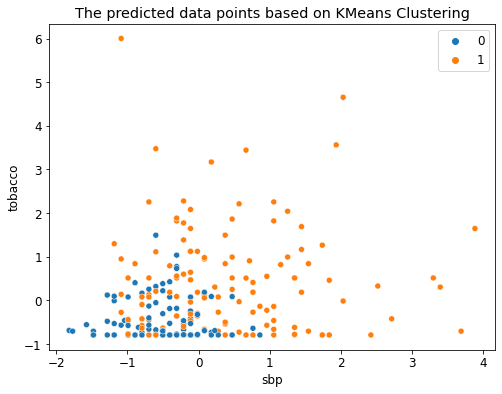

In [188]:
# Making Predictions and plots
pred_target = KmeansCluster(train_datafeatures, test_datafeatures)
plt.figure(figsize = (8,6)) 
plt.rc('font', size = 12) 
sns.scatterplot(x = test_datafeatures.sbp , y= test_datafeatures.tobacco, hue = test_datatargets.chd)
plt.title('The actual data points based on test set')
plt.show()
plt.figure(figsize = (8,6)) 
sns.scatterplot(x = test_datafeatures.sbp , y= test_datafeatures.tobacco, hue = pred_target)
plt.title('The predicted data points based on KMeans Clustering')
plt.show()

In [189]:
def trainmodel(train_datafeatures, test_datafeatures, train_datatargets, test_datatargets):
  model = keras.Sequential([                             # https://www.tensorflow.org/guide/keras/train_and_evaluate
  keras.layers.Dense(units = 500 , activation = "relu"),  # FCL (500 units ) // first hidden layer
  keras.layers.Dense(units = 500, activation = "relu"),   # FCL (500 units ) // second hidden layer
  keras.layers.Dense(units = 128, activation = "relu"),   # FCL (128 units ) // third hidden layer
  keras.layers.Dense(units = 2, activation="softmax") ])  # FCL (2 units ) // last hidden layer
  model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
  y_train = to_categorical(train_datatargets.astype('float32'))   # https://keras.rstudio.com/reference/to_categorical.html
  y_test = to_categorical(test_datatargets.astype('float32'))  
  history = model.fit(train_datafeatures, y_train, batch_size = 12, epochs = 35)   
  loss, accuracy = model.evaluate(test_datafeatures, y_test)
  print("Accuracy of Neural Network Model : {} % ".format(round(accuracy,3)*100))
  return model

In [190]:
model = trainmodel(train_datafeatures, test_datafeatures, train_datatargets, test_datatargets)

Epoch 1/35
20/20 [==============================] - 1s 6ms/step - loss: 0.6610 - accuracy: 0.6234
Epoch 2/35
20/20 [==============================] - 0s 5ms/step - loss: 0.5956 - accuracy: 0.6797
Epoch 3/35
20/20 [==============================] - 0s 5ms/step - loss: 0.5251 - accuracy: 0.7229
Epoch 4/35
20/20 [==============================] - 0s 5ms/step - loss: 0.5053 - accuracy: 0.7316
Epoch 5/35
20/20 [==============================] - 0s 5ms/step - loss: 0.4759 - accuracy: 0.7749
Epoch 6/35
20/20 [==============================] - 0s 5ms/step - loss: 0.4630 - accuracy: 0.7835
Epoch 7/35
20/20 [==============================] - 0s 5ms/step - loss: 0.4341 - accuracy: 0.7922
Epoch 8/35
20/20 [==============================] - 0s 5ms/step - loss: 0.4118 - accuracy: 0.8139
Epoch 9/35
20/20 [==============================] - 0s 4ms/step - loss: 0.3934 - accuracy: 0.8095
Epoch 10/35
20/20 [==============================] - 0s 5ms/step - loss: 0.3783 - accuracy: 0.8355
Epoch 11/35
20/20 [

In [191]:
pred_target = model.predict(test_datafeatures)
pred_target = np.argmax(pred_target, axis = -1)

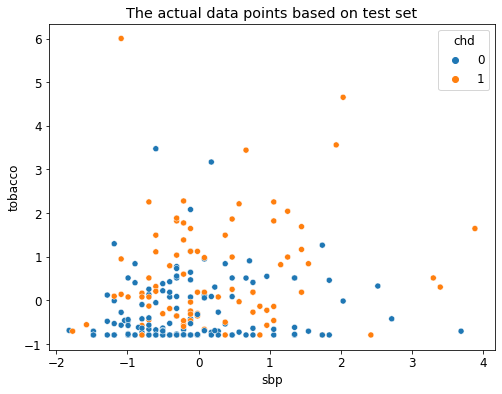

In [192]:
plt.figure(figsize = (8,6)) 
plt.rc('font', size = 12) 
sns.scatterplot(x = test_datafeatures.sbp , y= test_datafeatures.tobacco, hue = test_datatargets.chd)
plt.title('The actual data points based on test set')
plt.show()

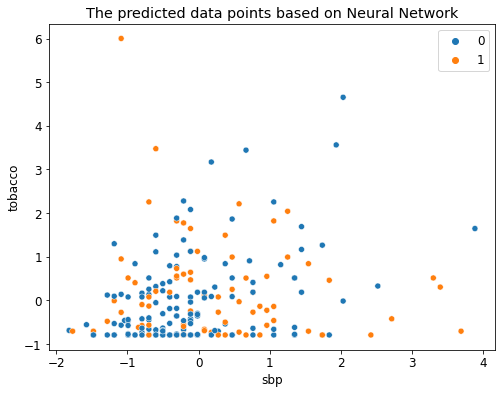

In [193]:
plt.figure(figsize = (8,6)) 
plt.rc('font', size = 12) 
sns.scatterplot(x = test_datafeatures.sbp , y= test_datafeatures.tobacco, hue = pred_target)
plt.title('The predicted data points based on Neural Network')
plt.show()

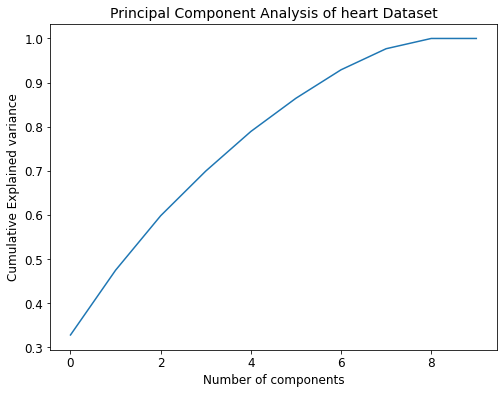

In [194]:
# PCA Analysis based on Sklearn
pca = PCA()                               # https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
principalComponents = pca.fit_transform(train_datafeatures)
plt.figure(figsize = (8,6)) 
plt.rc('font', size = 12) 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Principal Component Analysis of heart Dataset",fontsize=14)    # https://www.kaggle.com/pmmilewski/pca-decomposition-and-keras-neural-network
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance')
plt.show()

In [195]:
pca.explained_variance_ratio_.cumsum()

array([0.32787125, 0.47468342, 0.5981531 , 0.6994026 , 0.78916903,
       0.864516  , 0.92899994, 0.97675636, 1.        , 1.        ])

In [196]:
pca = PCA(n_components = 7)
pca_train_datafeatures = pca.fit_transform(train_datafeatures)
pca_test_datafeatures = pca.transform(test_datafeatures) 
pca_pred_target = KmeansCluster( pca_train_datafeatures, pca_test_datafeatures )


Accuracy of KMeans Clustering: 65.8 % 


In [197]:
train_datafeatures.shape

(231, 10)

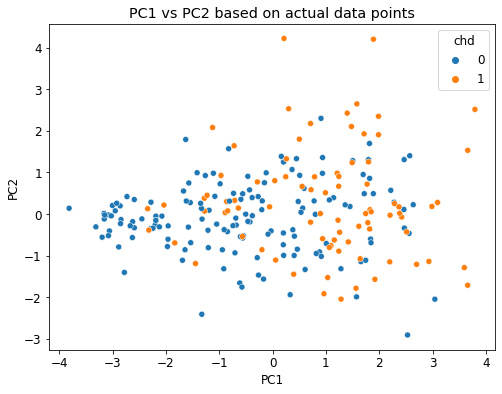

In [198]:
plt.figure(figsize = (8,6)) 
plt.rc('font', size = 12) 
sns.scatterplot(x = pca_test_datafeatures[:,0], y = pca_test_datafeatures[:,1], hue = test_datatargets.chd)
plt.title('PC1 vs PC2 based on actual data points')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

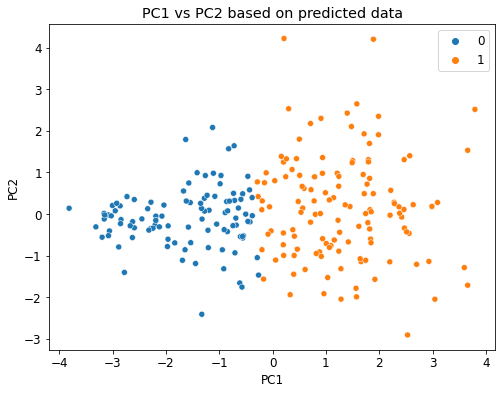

In [199]:
plt.figure(figsize = (8,6)) 
plt.rc('font', size = 12) 
sns.scatterplot(x = pca_test_datafeatures[:,0], y = pca_test_datafeatures[:,1], hue = pca_pred_target)
plt.title('PC1 vs PC2 based on predicted data')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [200]:
model = trainmodel (pca_train_datafeatures, pca_test_datafeatures, train_datatargets, test_datatargets)

Epoch 1/35
20/20 [==============================] - 1s 5ms/step - loss: 0.6358 - accuracy: 0.6710
Epoch 2/35
20/20 [==============================] - 0s 5ms/step - loss: 0.5450 - accuracy: 0.7186
Epoch 3/35
20/20 [==============================] - 0s 5ms/step - loss: 0.5199 - accuracy: 0.7403
Epoch 4/35
20/20 [==============================] - 0s 5ms/step - loss: 0.4946 - accuracy: 0.7532
Epoch 5/35
20/20 [==============================] - 0s 6ms/step - loss: 0.4847 - accuracy: 0.7619
Epoch 6/35
20/20 [==============================] - 0s 5ms/step - loss: 0.4673 - accuracy: 0.7706
Epoch 7/35
20/20 [==============================] - 0s 4ms/step - loss: 0.4562 - accuracy: 0.7965
Epoch 8/35
20/20 [==============================] - 0s 5ms/step - loss: 0.4403 - accuracy: 0.7965
Epoch 9/35
20/20 [==============================] - 0s 6ms/step - loss: 0.4074 - accuracy: 0.8095
Epoch 10/35
20/20 [==============================] - 0s 5ms/step - loss: 0.4100 - accuracy: 0.8139
Epoch 11/35
20/20 [

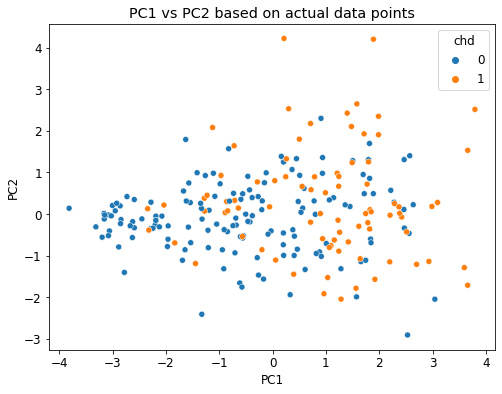

In [201]:
plt.figure(figsize = (8,6)) 
plt.rc('font', size = 12) 
sns.scatterplot(x = pca_test_datafeatures[:,0], y = pca_test_datafeatures[:,1], hue = test_datatargets.chd)
plt.title('PC1 vs PC2 based on actual data points')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [202]:
pred_target = model.predict(pca_test_datafeatures)
pred_target = np.argmax(pred_target, axis=-1)

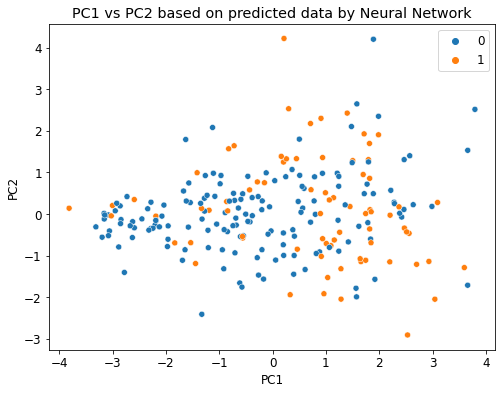

In [203]:
plt.figure(figsize = (8,6)) 
plt.rc('font', size = 12) 
sns.scatterplot(x = pca_test_datafeatures[:,0], y = pca_test_datafeatures[:,1], hue = pred_target)
plt.title('PC1 vs PC2 based on predicted data by Neural Network')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [204]:
# Bonus Questions 
# PART A
# Reproduce the result again using the sklearn model to validate/compare result to our build model.
model = LogisticRegression()   # https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24
model.fit(datafeatures, np.ravel(datatargets.T))   
predicted_classes = model.predict(datafeatures)
accuracy = accuracy_score(datatargets,predicted_classes)
print("Accuracy of logistic regression : {} % ".format(round(accuracy*100,3)))

Accuracy of logistic regression : 73.377 % 


In [205]:
# PART B
model = LogisticRegression()   
pca_test_datatargets = pca.transform(test_datafeatures) 
model.fit(pca_train_datafeatures, np.ravel(train_datatargets))
predicted_classes = model.predict(pca_test_datafeatures)
accuracy = accuracy_score(test_datatargets,predicted_classes)
print("Accuracy of logistic regression after PCA: {} % ".format(round(accuracy*100,3)))

Accuracy of logistic regression after PCA: 74.892 % 
